In [9]:
import keras
import matplotlib.pyplot as plt
keras.__version__

'2.2.0'

In [4]:
# load the data set
library(keras)
data <- dataset_boston_housing()
c(c(train_data,train_targets), c(test_data,test_targets)) %<-% data
# transform the training and test labels
train_targets <- (train_targets*1000)^2/2500000
test_targets <- (test_targets*1000)^2/2500000

SyntaxError: invalid syntax (<ipython-input-4-03a5d4c18821>, line 4)

In [21]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [7]:
x <- (train_targets*1000)^2/2500000
y_train.hist()
hist(y_tain, main = "Original Prices")
#hist(x, main = "Transformed Prices")

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

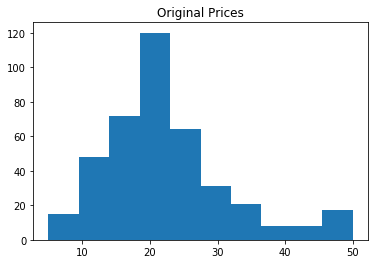

In [22]:
plt.hist(y_train) 
plt.title("Original Prices") 
plt.show()

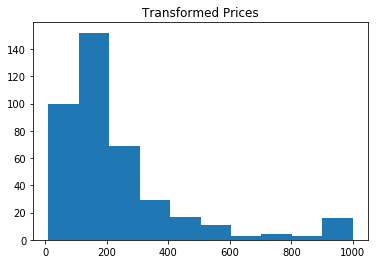

In [25]:
plt.hist((y_train*1000)**2/2500000) 
plt.title("Transformed Prices") 
plt.show()

In [ ]:
keras::loss_mean_absolute_error()
keras::loss_mean_absolute_percentage_error()
keras::loss_mean_squared_error()
keras::loss_mean_squared_logarithmic_error()

In [75]:
mean_absolute_error()
mean_absolute_percentage_error()
mean_squared_error()
mean_squared_logarithmic_error()

NameError: name 'mean_absolute_error' is not defined

In [ ]:
# Mean Log Absolute Error
MLAE <- function( y_true, y_pred ) {
  K <- backend()
  K$mean( K$abs( K$log( K$relu(y_true *1000 ) + 1 ) - 
      K$log( K$relu(y_pred*1000 ) + 1)))
}
# Mean Squared Log Absolute Error
MSLAE <- function( y_true, y_pred ) {
  K <- backend()
  K$mean( K$pow( K$abs( K$log( K$relu(y_true *1000 ) + 1 ) - 
    K$log( K$relu(y_pred*1000 ) + 1)), 2))
}

In [48]:
from keras import backend as K

def MLAE(y_true, y_pred):    
    first_log = K.log(K.clip(y_pred*1000, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true*1000, K.epsilon(), None) + 1.)    
    return K.mean(K.abs(first_log - second_log), axis=-1)


def MSLAE(y_true, y_pred):    
    first_log = K.log(K.clip(y_pred*1000, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true*1000, K.epsilon(), None) + 1.)    
    return K.mean(K.square(first_log - second_log), axis=-1)


In [ ]:
# load the data set
library(keras)
data <- dataset_boston_housing()
c(c(train_data,train_targets), c(test_data,test_targets)) %<-% data
# transform the training and test labels
train_targets <- (train_targets*1000)^2/2500000
test_targets <- (test_targets*1000)^2/2500000

In [55]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# transform the training and test labels
y_train = (y_train*1000)**2/2500000
y_test = (y_test*1000)**2/2500000


In [33]:
x_train.shape[1]

13

In [56]:
# The model as specified in "Deep Learning with R"
model <- keras_model_sequential() %>%
  layer_dense(units = 64, activation = "relu",
              input_shape = dim(train_data)[[2]]) %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_dense(units = 1)

SyntaxError: invalid syntax (<ipython-input-56-de67a3bbdf88>, line 2)

In [62]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))


In [ ]:
# Compile the model, and select one of the loss functions
losses <- c(keras::loss_mean_squared_error,  
    keras::loss_mean_squared_logarithmic_error, MLAE, MSLAE)

model %>% compile(
  optimizer = "rmsprop",
  loss = losses[1],
  metrics = c("mae")
)

In [73]:
losses = ['mean_squared_error', 'mean_squared_logarithmic_error', MLAE, MSLAE]

model.compile(optimizer='rmsprop',
              loss=losses[0],
              metrics=['mae'])


In [59]:
# Train the model with validation
model %>% fit(
  train_data,
  train_targets,
  epochs = 100,
  batch_size = 5,
  verbose = 1,
  validation_split = 0.2
)

SyntaxError: invalid syntax (<ipython-input-59-f4617ace5651>, line 2)

In [60]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=5,
                    validation_split = .2,
                    verbose=0)

In [61]:
results = model.evaluate(x_test, y_test, verbose = 0)
results

[0.20429411588930615, 80.09194018794041]

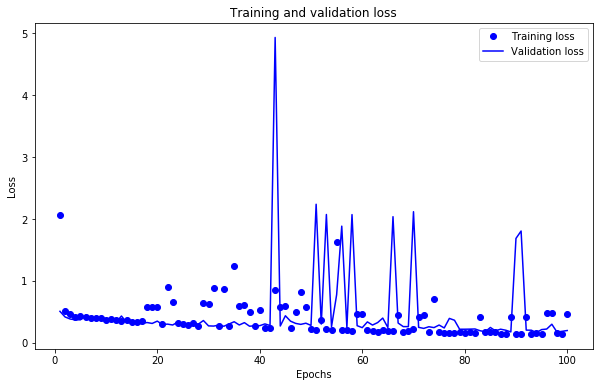

In [74]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10,6)) 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()